In [1]:
%matplotlib inline

import esoreader
reload(esoreader)
import pandas as pd
import os

In [2]:
# change this to point to where you checked out the GitHub project
PROJECT_PATH = r"c:\projects\UMEM-JBPS-Paper"

# this is the output of the 01-run-hpz workflow
ESO_PATH = os.path.join(PROJECT_PATH, 'workflows', 'output', '01-run-hpz', '01-run-hpz.eso')

# this is where we will store the aggregated heating and cooling data
OUTPUT_PATH = os.path.join(PROJECT_PATH, 'workflows', 'output', '01-run-hpz', '01-run-hpz.csv')

# yeah... we need an index for timeseries...
HOURS_IN_YEAR = pd.date_range('2013-01-01', '2013-12-31 T23:00', freq='H')

In [58]:
hpz = esoreader.read_from_path(ESO_PATH)

In [59]:
# we are probably interested in the 'Zone_XYZ Total Heating Energy' variables...
# after looking at the data, it seems they all have the key: "EMS"
sorted(set(map(lambda t: t[2], hpz.find_variable('total heating energy', key='EMS'))))

['Zone_D_CORE Total Heating Energy {J}',
 'Zone_E_CORE_M Total Heating Energy {J}',
 'Zone_E_NE Total Heating Energy {J}',
 'Zone_E_NW Total Heating Energy {J}',
 'Zone_E_SE Total Heating Energy {J}',
 'Zone_E_SW Total Heating Energy {J}',
 'Zone_E_W Total Heating Energy {J}',
 'Zone_F_CORE Total Heating Energy {J}',
 'Zone_F_E Total Heating Energy {J}',
 'Zone_F_NE Total Heating Energy {J}',
 'Zone_F_NI Total Heating Energy {J}',
 'Zone_F_SE Total Heating Energy {J}',
 'Zone_F_SI Total Heating Energy {J}',
 'Zone_G_CORE Total Heating Energy {J}',
 'Zone_G_E Total Heating Energy {J}',
 'Zone_G_N Total Heating Energy {J}',
 'Zone_G_NE Total Heating Energy {J}',
 'Zone_G_NW Total Heating Energy {J}',
 'Zone_G_S Total Heating Energy {J}',
 'Zone_G_SE Total Heating Energy {J}',
 'Zone_G_SW Total Heating Energy {J}',
 'Zone_G_W Total Heating Energy {J}']

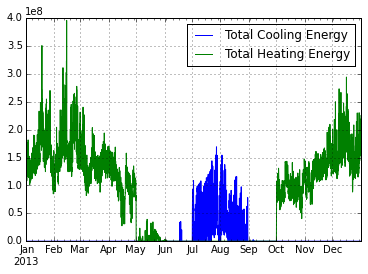

In [60]:
heating = hpz.to_frame('total heating energy', key=key, index=HOURS_IN_YEAR, use_key_for_columns=False).sum(axis=1)
cooling = hpz.to_frame('total cooling energy', key=key, index=HOURS_IN_YEAR, use_key_for_columns=False).sum(axis=1)
df = pd.DataFrame({'Total Heating Energy': heating, 'Total Cooling Energy': cooling})
df.plot()

In [66]:
df.to_csv(OUTPUT_PATH, index_label='Time')